In [1]:
import torch
from torch_geometric.data import Data, Batch

# Creating three small graph data objects
data1 = Data(x=torch.tensor([[1], [1], [1]], dtype=torch.float), 
             edge_index=torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long))

data2 = Data(x=torch.tensor([[2], [2]], dtype=torch.float), 
             edge_index=torch.tensor([[0, 1], [1, 0]], dtype=torch.long))

data3 = Data(x=torch.tensor([[3], [3], [3]], dtype=torch.float), 
             edge_index=torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long))

# Batching the data objects
batch = Batch.from_data_list([data1, data2, data3])

print(batch.batch)


/cluster/tufts/liulab/lib/anaconda3/envs/xiaohui-torch11/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


tensor([0, 0, 0, 1, 1, 2, 2, 2])


In [2]:
data1

Data(x=[3, 1], edge_index=[2, 4])

In [3]:
data2


Data(x=[2, 1], edge_index=[2, 2])

In [4]:
data3

Data(x=[3, 1], edge_index=[2, 4])

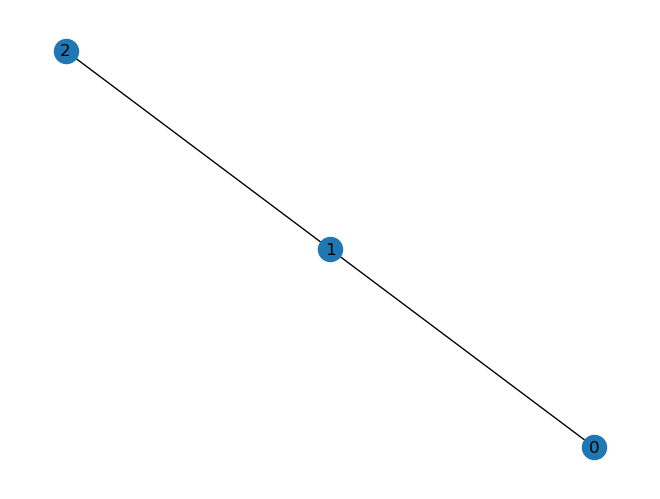

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Convert to a networkx graph
G = to_networkx(data1, to_undirected=True)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


In [1]:
import torch

# Creating a tensor with gradient computation enabled
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
print(f"x: {x}")

# Performing some operation
y = x * 2
print(f"y: {y}")

# Detaching the tensor
detached_y = y.detach()
print(f"detached_y: {detached_y}")

# Check if detached tensor requires gradient
print(f"Does detached_y require gradients? : {detached_y.requires_grad}")


/cluster/tufts/liulab/lib/anaconda3/envs/xiaohui-torch11/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


x: tensor([1., 2., 3.], requires_grad=True)
y: tensor([2., 4., 6.], grad_fn=<MulBackward0>)
detached_y: tensor([2., 4., 6.])
Does detached_y require gradients? : False


In [1]:
import torch
import torch.nn as nn

# Creating an Embedding module with 10 words each of dimension 4.
embedding = nn.Embedding(10, 4)

# Create an input tensor that includes indexes of the words.
# Let's assume 2, 3, 5 are indexes of three words in the dictionary.
input = torch.LongTensor([2, 3, 5])

# Get embeddings for the input words
embeddings = embedding(input)

print(embeddings)


/cluster/tufts/liulab/lib/anaconda3/envs/xiaohui-torch11/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[-1.6037, -0.4051,  0.4623,  0.0070],
        [ 0.5649,  1.2756, -0.3975, -0.4540],
        [ 0.7919,  0.8833,  0.5471,  2.8206]], grad_fn=<EmbeddingBackward0>)


In [2]:
embedding

Embedding(10, 4)

In [3]:
import torch
import torch.nn as nn

# Define input dimension and number of output dimensions
dim = 4

# Create a sequential model
model = nn.Sequential(
    nn.Linear(dim * 3, dim),
    nn.SiLU()
)

# Create a sample input vector (with dim*3 dimensions)
input = torch.randn(1, dim * 3)

# Pass the input through the model
output = model(input)

print(output)


tensor([[ 0.0230,  0.5509, -0.1335,  0.0348]], grad_fn=<SiluBackward0>)


In [4]:
input

tensor([[ 0.9261, -0.3345,  0.6821, -0.4051, -0.5679,  0.4270, -0.3444, -0.1505,
         -0.0520,  0.4818,  0.5531, -0.1235]])

In [1]:
import torch

# Create a tensor
x = torch.randn(3, 3)
print(x)

# View the tensor as (9, 1)
try:
    x_view = x.view(9, 1)
except Exception as e:
    print(e)

# Transpose the tensor
x_transpose = x.t()

# Trying to view the transposed tensor as (9, 1) will raise an error because 
# after transposing a tensor, it may not be stored in a contiguous block of memory
try:
    x_transpose_view = x_transpose.view(9, 1)
except Exception as e:
    print(e)  # Output: view size is not compatible with input tensor's size and stride

# Use contiguous to make the transposed tensor contiguous
x_transpose_contiguous = x_transpose.contiguous()

# Now viewing it as (9, 1) will not raise an error
x_transpose_contiguous_view = x_transpose_contiguous.view(9, 1)
print(x_transpose_contiguous_view)


/cluster/tufts/liulab/lib/anaconda3/envs/xiaohui-torch11/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[-1.2973,  0.7597,  1.2817],
        [-0.2053, -0.9385, -0.9493],
        [ 1.8169, -1.0340,  0.0928]])
view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
tensor([[-1.2973],
        [-0.2053],
        [ 1.8169],
        [ 0.7597],
        [-0.9385],
        [-1.0340],
        [ 1.2817],
        [-0.9493],
        [ 0.0928]])
